# comprehensive Evaluation of Machine Learning Models on Diamond Data Set
**Authar Name** : Hamza Hayat

**Linkdin** : [https://www.linkedin.com/in/hamza-hayat-7888b737b/]

**GitHub**  : [https://github.com/HAMZAARSHID123925]



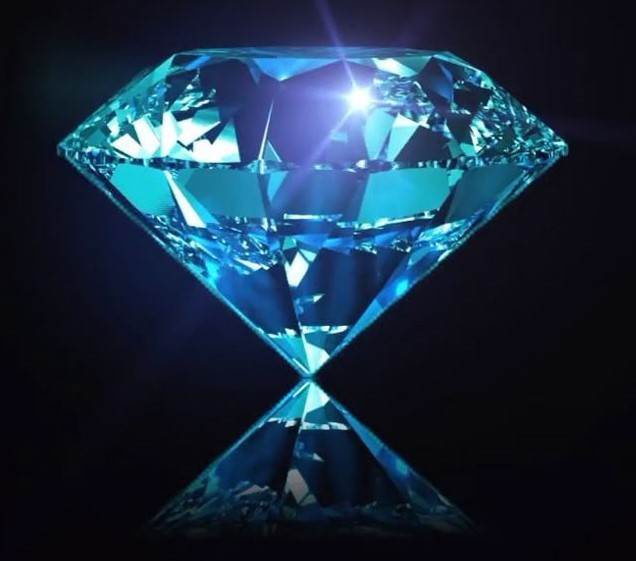

#1.  GoaL
- In this notebook, we will use **1,000 samples** from the Diamond dataset, then train **6  machine learning models**.
- Among all these models, we will choose the one that gives the **highest accuracy**.
- And then we will apply that selected model to some dummy data.

## Algorithms
i will evaluate the following Machine Learning Algorithm
- LinearRegression
- Support Vector Regression (SVR)
- DecissionTree Regression  
- XGBoost Regression
- KNN Regression
- RandoomForeast Regression


In [1]:
# loading the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
# for not showing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset of diamonds and picking only 10000 samples
df = sns.load_dataset('diamonds')
df = df.sample(1000, random_state=42)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1388 to 21429
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    1000 non-null   float64 
 1   cut      1000 non-null   category
 2   color    1000 non-null   category
 3   clarity  1000 non-null   category
 4   depth    1000 non-null   float64 
 5   table    1000 non-null   float64 
 6   price    1000 non-null   int64   
 7   x        1000 non-null   float64 
 8   y        1000 non-null   float64 
 9   z        1000 non-null   float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 66.3 KB


In [4]:
print(f'number of rows',{df.shape[0]})
print(f'number of columns',{df.shape[1]})

number of rows {1000}
number of columns {10}


## 1.1 Observation
- number of column in data set is 10
- number of rows is 10000
- 6 column is floating (carat,depth,table,x,y,z)
- 3 is catagorical column (cut,color,clarity)
- 1  column is integer (price),this is over target feature


# 2. Pre Processing

<Axes: >

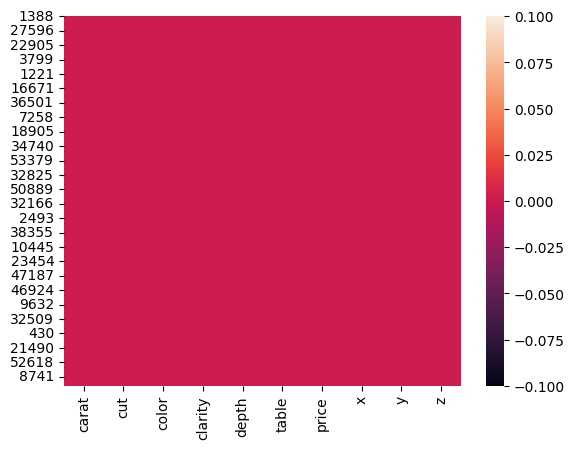

In [5]:
# first checking for null values in data set
# heatmap
sns.heatmap(df.isnull())

## 2.1 Observation
congrats 🥰 no null values in data set of diamonds

In [6]:
# Encoding the catagorical features using for loop
encoder = LabelEncoder()
for col in df:
  if df[col].dtype == "category":
     df[col] = encoder.fit_transform(df[col])
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,2,3,6,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,4,2,7,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,2,1,7,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,3,1,7,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,2,1,3,62.3,55.0,6901,7.44,7.37,4.61


In [7]:
# cheking the correlation between features
#And after that, we will decide which features are best for us and which should be dropped, so that noise in the data is reduced.
df.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.097112,0.338520,-0.253051,-0.078646,0.200590,0.929295,0.980120,0.979933,0.978572
cut,0.097112,1.000000,0.012947,0.044903,-0.109494,0.090317,0.115149,0.091331,0.097258,0.082758
color,0.338520,0.012947,1.000000,-0.041970,-0.030292,0.025708,0.239913,0.321904,0.324986,0.322124
clarity,-0.253051,0.044903,-0.041970,1.000000,-0.062508,-0.072864,-0.105511,-0.261744,-0.256112,-0.268924
depth,-0.078646,-0.109494,-0.030292,-0.062508,1.000000,-0.344625,-0.091508,-0.127685,-0.127643,-0.009381
table,0.200590,0.090317,0.025708,-0.072864,-0.344625,1.000000,0.149751,0.218992,0.212593,0.177378
price,0.929295,0.115149,0.239913,-0.105511,-0.091508,0.149751,1.000000,0.891990,0.894272,0.889160
x,0.980120,0.091331,0.321904,-0.261744,-0.127685,0.218992,0.891990,1.000000,0.998434,0.992165
y,0.979933,0.097258,0.324986,-0.256112,-0.127643,0.212593,0.894272,0.998434,1.000000,0.992446
z,0.978572,0.082758,0.322124,-0.268924,-0.009381,0.177378,0.889160,0.992165,0.992446,1.000000


<Axes: >

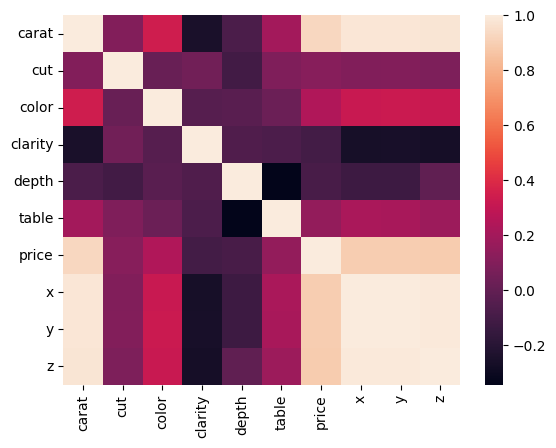

In [8]:
# checking for correlation
sns.heatmap(df.corr())

## 2.2 Observation
- The **x, y, z, carat, and dimension** features are highly correlated with our target feature **Price**.
- We will drop the **table** and **depth** columns because they are very weakly correlated.
By doing this, noise will be reduced in our data, and the model will make better predictions.


In [9]:
# droping the table and depth column
df.drop('table',axis=1,inplace=True)
df.drop('depth',axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,price,x,y,z
1388,0.24,2,3,6,559,3.97,4.00,2.47
50052,0.58,4,2,7,2201,5.44,5.42,3.26
41645,0.40,2,1,7,1238,4.76,4.74,2.95
42377,0.43,3,1,7,1304,4.92,4.89,2.98
17244,1.55,2,1,3,6901,7.44,7.37,4.61


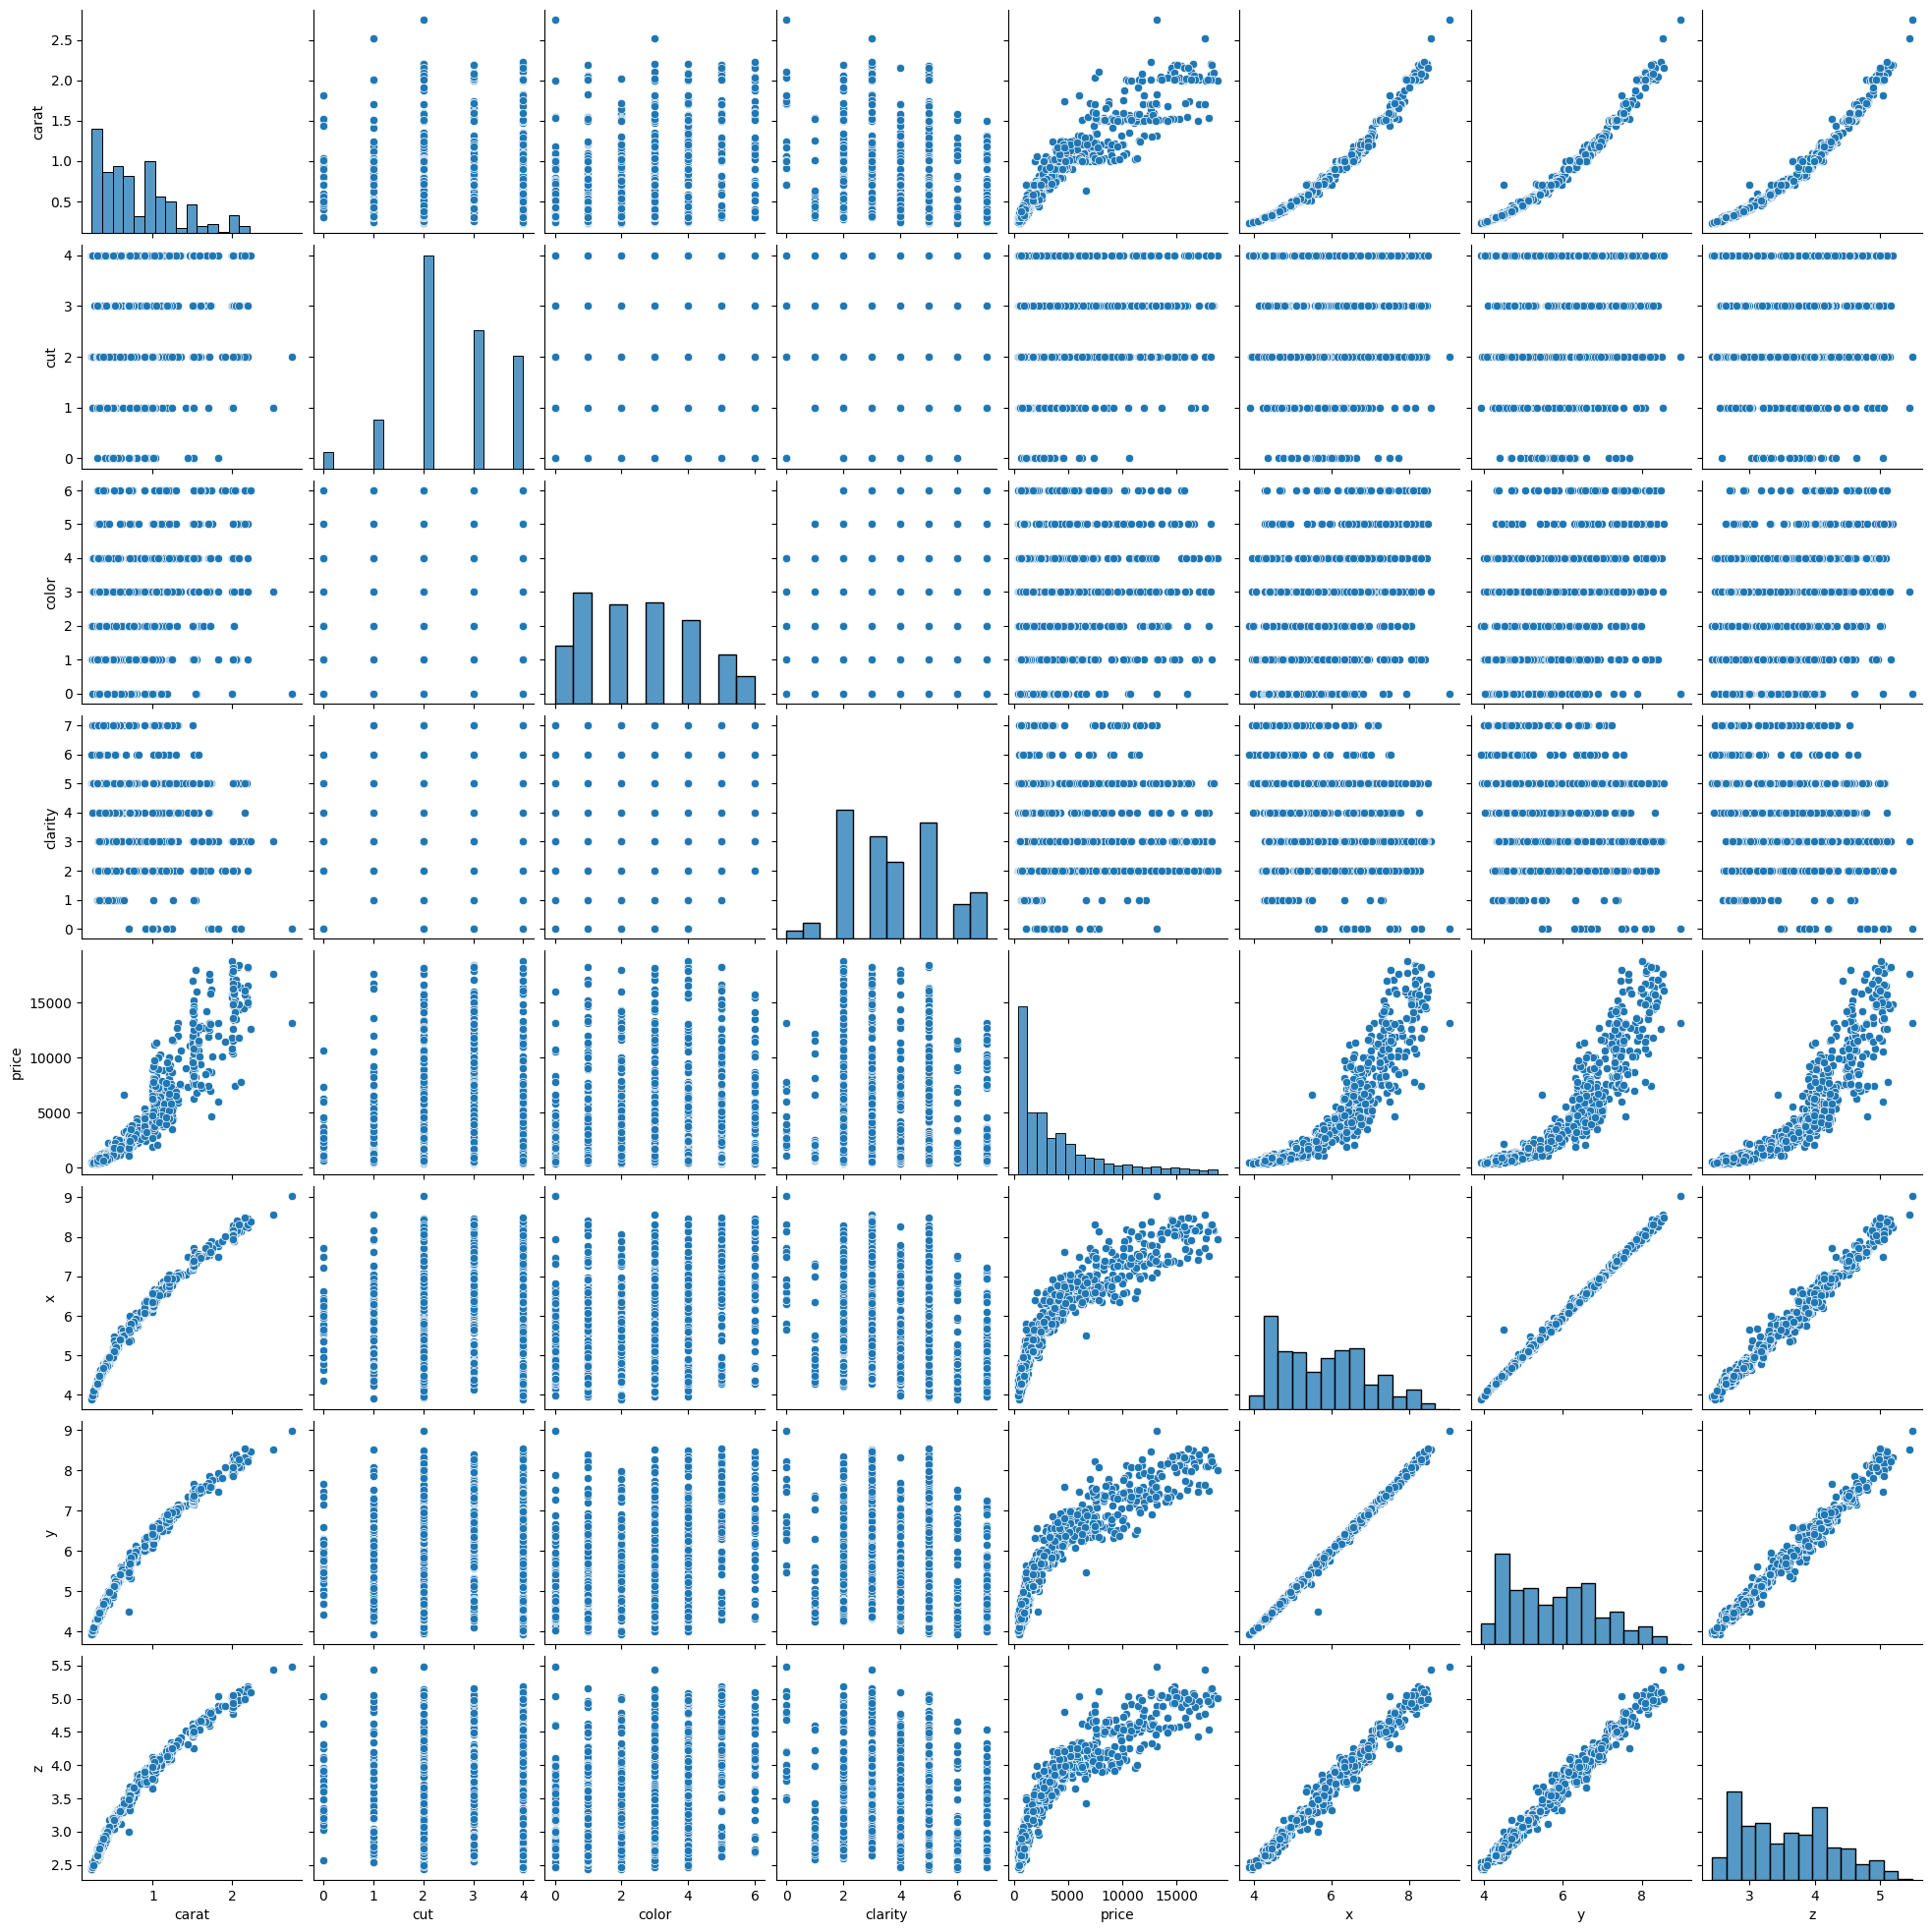

In [10]:
# We will check the distribution of the data to see how it is spread.
# If the data is not well distributed, then we will normalize it.
sns.pairplot(df)

- Our data is not normally distributed. Some models do not require normalization, such as **Decision Tree Regression, XGBoost Regression, and Random Forest Regression**. However, models like **SVR** and **KNN** do require the data to be normalized, so we will normalize the data.

- **Question:** If we normalize the data, will it negatively affect the models that don’t require normalization?
- **Answer:** No, not at all — it will not have any negative effect on those models.


In [11]:
# choosing the feature for target and traning
X = df.drop('price',axis=1)
y = df['price']
# spliting the data for testing and traning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [12]:
# lets normalize the X column
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
df.head()

,carat,cut,color,clarity,x,y,z
0,-1.199107,-0.522415,0.257870,1.298325,-1.596763,-1.577728,-1.586974
1,-0.505156,1.434195,-0.337673,1.883684,-0.314965,-0.333677,-0.457872
2,-0.872541,-0.522415,-0.933216,1.883684,-0.907905,-0.929420,-0.900938
3,-0.811310,0.455890,-0.933216,1.883684,-0.768390,-0.798006,-0.858060
4,1.474646,-0.522415,-0.933216,-0.457750,1.428978,1.374703,1.471606


In [13]:
%%time
# crating a dect for models and their hyperparameter
model = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            'splitter': ['best', 'random'],
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [1, 10, 100, 1000],

        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3,5,7,10],
            'weights': ['uniform', 'distance'],

        }
    }
    ,
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100,300,500,1000],

            'max_depth': [None, 10, 20, 30],
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(),
        'params': {
            'n_estimators': [100,200,500,300]
        }
    }
}


CPU times: user 212 µs, sys: 7 µs, total: 219 µs
Wall time: 228 µs


In [14]:
%%time
# initialize the list for score matrics
model_scores = []
# creating a loop for fiting every model on data
for name,regressor in model.items():
  print(f"Training {name}...") # Add this line to print the model name
  grid = GridSearchCV(
      regressor['model'],
      regressor['params'],
      cv=5,
      return_train_score=False
  )
  grid.fit(X_train,y_train) # Fit on training data
  # predicting the x_test
  y_pred = grid.predict(X_test) # Predict on testing data
  # checkiing for the accuracy score
  model_scores.append({
      'model_name':name,
      "r2" : r2_score(y_test,y_pred),
      "mae" : mean_absolute_error(y_test,y_pred),
      "mse": mean_squared_error(y_test,y_pred),
      "mape": mean_absolute_percentage_error(y_test,y_pred),
      "best_params": grid.best_params_ # Store best parameters


  })

sorted_models = pd.DataFrame(model_scores,columns=['model_name','r2','mae','mse','mape','best_params'])
sorted_models.sort_values(by='r2',ascending=False)

# display the matrics dataframe
display(sorted_models.round(2))

Training LinearRegression...
Training DecisionTreeRegressor...
Training SVR...
Training KNeighborsRegressor...
Training RandomForestRegressor...
Training XGBRegressor...


,model_name,r2,mae,mse,mape,best_params
0,LinearRegression,0.87,938.35,2410047.53,0.35,{}
1,DecisionTreeRegressor,0.93,622.29,1349360.56,0.16,"{'criterion': 'absolute_error', 'splitter': 'b..."
2,SVR,0.91,677.87,1690159.10,0.16,"{'C': 1000, 'kernel': 'poly'}"
3,KNeighborsRegressor,0.94,577.90,1064041.18,0.16,"{'n_neighbors': 5, 'weights': 'distance'}"
4,RandomForestRegressor,0.96,470.76,742874.22,0.12,"{'max_depth': 30, 'n_estimators': 100}"
5,XGBRegressor,0.96,463.96,781740.00,0.10,{'n_estimators': 100}


CPU times: user 3min 1s, sys: 544 ms, total: 3min 1s
Wall time: 3min 1s


# Best Model Selection
By looking at the accuracy of all these models, we selected **XGBRegressor** because its accuracy was the best among all the models.



In [15]:
# Now, we will use **XGBRegressor** on the data because its accuracy was the highest.
# And we will use the same parameters that GridSearch gave us.
model = XGBRegressor(n_estimators=100)
# fiting the model
model.fit(X_train,y_train)
# predecting the x_test for checking the accuracy of the model
y_pred = model.predict(X_test)
# Evaluating the model , Matrics is r2, mse,mae,accuracy_score
print(f'r2 score is {r2_score(y_test,y_pred)}')
print(f'mean absolute error is {mean_absolute_error(y_test,y_pred)}')
print(f'mean squared error is {mean_squared_error(y_test,y_pred)}')
print(f'mean absolute percentage error is {mean_absolute_percentage_error(y_test,y_pred)}')


r2 score is 0.9569265246391296
mean absolute error is 463.9644775390625
mean squared error is 781740.0
mean absolute percentage error is 0.10050570219755173


In [16]:
df.head()

,carat,cut,color,clarity,x,y,z
0,-1.199107,-0.522415,0.257870,1.298325,-1.596763,-1.577728,-1.586974
1,-0.505156,1.434195,-0.337673,1.883684,-0.314965,-0.333677,-0.457872
2,-0.872541,-0.522415,-0.933216,1.883684,-0.907905,-0.929420,-0.900938
3,-0.811310,0.455890,-0.933216,1.883684,-0.768390,-0.798006,-0.858060
4,1.474646,-0.522415,-0.933216,-0.457750,1.428978,1.374703,1.471606


In [19]:
# Now, we will create some dummy data and use it to **predict the diamond’s price**.
Diamond_dummy_data = {
    "carat" : [0.65],
    "cut" : ['Ideal'],
    "color" : ['E'],
    "clarity" : ['SI1'],
    "x" : [5.50],
    "y" : [5.50],
    "z" : [4.50]
}

new_x = pd.DataFrame(Diamond_dummy_data)
# encoding the new_x columns
encoder = LabelEncoder()
new_x['cut'] = encoder.fit_transform(new_x['cut'])
new_x['color'] = encoder.fit_transform(new_x['color'])
new_x['clarity'] = encoder.fit_transform(new_x['clarity'])
# predicting the dummy data
pred_price = model.predict(new_x)
print(f"the predecting price of Diamond is {pred_price[0]}")

the predecting price of Diamond is 2512.933837890625


# Conclusion
**Best Model** According to the parameters I gave, the best model was **XGBRegressor**, and **DecisionTreeRegressor** — both had an **R² score of 0.96**.

**Secound** Next, **KNN Regressor** had an **R² of 0.94** and **SVR** had **0.91**.

**Third** And in 3rd place came **LinearRegression** and **DecisionTree** with an **R² score below 0.90**.
